In [5]:
import pandas as pd
import statsmodels.api as sm

# Load data
df = pd.read_csv('/content/DATA MONKEYPOX.csv').head(50)

# Cek nama kolom
print("Kolom tersedia:", df.columns)

# Konversi target (positif/negatif) ke numerik
df['diagnosed'] = df['MonkeyPox'].map({'Positive': 1, 'Negative': 0})

# Mapping gejala ke format numerik
df['fever'] = df['Systemic Illness'].map(lambda x: 1 if x == 'Fever' else 0)
df['rash'] = df['Oral Lesions'].map({True: 1, False: 0})
df['swollen_lymph_nodes'] = df['Swollen Tonsils'].map({True: 1, False: 0})

# Buat dataframe prediktor
X = df[['fever', 'rash', 'swollen_lymph_nodes']]
X = sm.add_constant(X)  # Tambah konstanta

# Target variabel
y = df['diagnosed']

# Cek dan tangani missing values
print("Jumlah missing value di X:\n", X.isnull().sum())
print("Jumlah missing value di y:\n", y.isnull().sum())

# Drop baris yang memiliki NaN (jika ada)
X = X.dropna()
y = y[X.index]  # sesuaikan y dengan X

# Fit model regresi logistik
model = sm.Logit(y, X).fit()

# Tampilkan ringkasan hasil
print(model.summary())


Kolom tersedia: Index(['Patient_ID', 'Systemic Illness', 'Rectal Pain', 'Sore Throat',
       'Penile Oedema', 'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils',
       'HIV Infection', 'Sexually Transmitted Infection', 'MonkeyPox'],
      dtype='object')
Jumlah missing value di X:
 const                  0
fever                  0
rash                   0
swollen_lymph_nodes    0
dtype: int64
Jumlah missing value di y:
 0
Optimization terminated successfully.
         Current function value: 0.605322
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              diagnosed   No. Observations:                   50
Model:                          Logit   Df Residuals:                       46
Method:                           MLE   Df Model:                            3
Date:                Wed, 28 May 2025   Pseudo R-squ.:                 0.08846
Time:                        06:01:53   Log-Likelihood:                -3

Optimization terminated successfully.
         Current function value: 0.653162
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              diagnosed   No. Observations:                   50
Model:                          Logit   Df Residuals:                       46
Method:                           MLE   Df Model:                            3
Date:                Wed, 28 May 2025   Pseudo R-squ.:                 0.01642
Time:                        06:09:40   Log-Likelihood:                -32.658
converged:                       True   LL-Null:                       -33.203
Covariance Type:            nonrobust   LLR p-value:                    0.7794
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1899      0.493      0.385      0.700      -0.776       1.156
fe

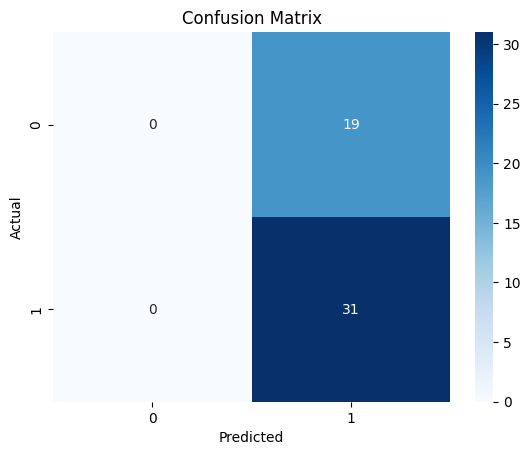

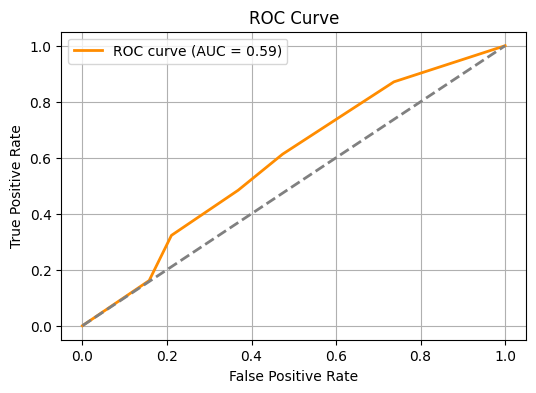

In [6]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Load data
df = pd.read_csv('/content/DATA MONKEYPOX.csv').head(50)

# Binerisasi target dan gejala
df['diagnosed'] = df['MonkeyPox'].map({'Positive': 1, 'Negative': 0})
df['fever'] = df['Systemic Illness'].map(lambda x: 1 if x == 'Fever' else 0)
df['swollen_lymph_nodes'] = df['Systemic Illness'].map(lambda x: 1 if x == 'Swollen Lymph Nodes' else 0)
df['rash'] = df['Oral Lesions'].map({True: 1, False: 0})

# Model
X = df[['fever', 'rash', 'swollen_lymph_nodes']]
X = sm.add_constant(X)
y = df['diagnosed']
model = sm.Logit(y, X).fit()
print(model.summary())

# Prediksi probabilitas dan label
df['pred_prob'] = model.predict(X)
df['pred_class'] = (df['pred_prob'] >= 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y, df['pred_class'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y, df['pred_prob'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()
